# Building Predictive Models

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
# set the path of the processed data
processed_data_path = os.path.join(os.path.pardir,'data','processed')
train_file_path = os.path.join(processed_data_path,'train.csv')
test_file_path = os.path.join(processed_data_path,'test.csv')


In [3]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)


### diagnosis of heart disease

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              294 non-null    int64  
 1   diagnosed               294 non-null    int64  
 2   age                     294 non-null    float64
 3   sex                     294 non-null    float64
 4   trestbps                294 non-null    float64
 5   chol                    294 non-null    int64  
 6   fbs                     294 non-null    int64  
 7   restecg                 294 non-null    int64  
 8   thalach                 294 non-null    float64
 9   exang                   294 non-null    int64  
 10  oldpeak                 294 non-null    float64
 11  slope                   294 non-null    int64  
 12  ca                      294 non-null    float64
 13  thal                    294 non-null    float64
 14  num                     294 non-null    in

In [5]:
train_df.rename(columns={'Unnamed: 0': 'unnamed'}, inplace=True)

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              303 non-null    int64  
 1   diagnosed               303 non-null    int64  
 2   age                     303 non-null    float64
 3   sex                     303 non-null    float64
 4   trestbps                303 non-null    float64
 5   chol                    303 non-null    int64  
 6   fbs                     303 non-null    int64  
 7   restecg                 303 non-null    int64  
 8   thalach                 303 non-null    float64
 9   exang                   303 non-null    int64  
 10  oldpeak                 303 non-null    float64
 11  slope                   303 non-null    int64  
 12  ca                      303 non-null    float64
 13  thal                    303 non-null    float64
 14  num                     303 non-null    in

In [7]:
test_df.rename(columns={'Unnamed: 0': 'unnamed'}, inplace=True)

### diagnosis of heart disease

In [8]:
# diagnosis of heart disease
test_df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [9]:
train_df.head()

,unnamed,diagnosed,age,sex,trestbps,chol,fbs,restecg,thalach,exang,...,cp_3.0,cp_4.0,cat_A,cat_B,cat_C,cat_D,cat_E,cat_F,cat_G,cat_Z
0,0,0,28.0,1.0,130.0,132,0,2,185.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,29.0,1.0,120.0,243,0,0,160.0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,29.0,1.0,140.0,242,0,0,170.0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,30.0,0.0,170.0,237,0,1,170.0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,31.0,0.0,100.0,219,0,1,150.0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
test_df.head()

,unnamed,diagnosed,age,sex,trestbps,chol,fbs,restecg,thalach,exang,...,cp_3.0,cp_4.0,cat_A,cat_B,cat_C,cat_D,cat_E,cat_F,cat_G,cat_Z
0,0,-888,63.0,1.0,145.0,233,1,2,150.0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,-888,67.0,1.0,160.0,286,0,2,108.0,1,...,0,1,0,1,0,0,0,0,0,0
2,2,-888,67.0,1.0,120.0,229,0,2,129.0,1,...,0,1,0,0,1,0,0,0,0,0
3,3,-888,37.0,1.0,130.0,250,0,0,187.0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,-888,41.0,0.0,130.0,204,0,2,172.0,0,...,0,0,0,0,0,0,1,0,0,0


### Data Preparation

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unnamed                 303 non-null    int64  
 1   diagnosed               303 non-null    int64  
 2   age                     303 non-null    float64
 3   sex                     303 non-null    float64
 4   trestbps                303 non-null    float64
 5   chol                    303 non-null    int64  
 6   fbs                     303 non-null    int64  
 7   restecg                 303 non-null    int64  
 8   thalach                 303 non-null    float64
 9   exang                   303 non-null    int64  
 10  oldpeak                 303 non-null    float64
 11  slope                   303 non-null    int64  
 12  ca                      303 non-null    float64
 13  thal                    303 non-null    float64
 14  num                     303 non-null    in

In [12]:
# populate 'diagnosed' attribute
#     Value 0: < 50% diameter narrowing
#     Value 1: > 50% diameter narrowing
test_df['diagnosed'] = test_df['num'].apply(lambda x: 0 if x == 0 else 1)

In [13]:
import sklearn

In [14]:
# The design is not to use train test split
# 'hungarian.processed.data' is training dataset
# 'cleveland.processed.data' is test dataset

X_train = train_df
y_train = train_df['diagnosed']

X_test = test_df
y_test = test_df['diagnosed']

print (X_train.shape,y_train.shape)
print (X_test.shape, y_test.shape)

(294, 33) (294,)
(303, 33) (303,)


In [15]:
# remove ca column
X_train = X_train.drop('ca', axis = 1)

In [16]:
# remove num column
X_train = X_train.drop('num', axis = 1)

In [17]:
# remove thal column
X_train = X_train.drop('thal', axis = 1)

In [18]:
# remove cat_G column
X_train = X_train.drop('cat_G', axis = 1)

In [19]:
# remove cat_Z column
X_train = X_train.drop('cat_Z', axis = 1)

<AxesSubplot:>

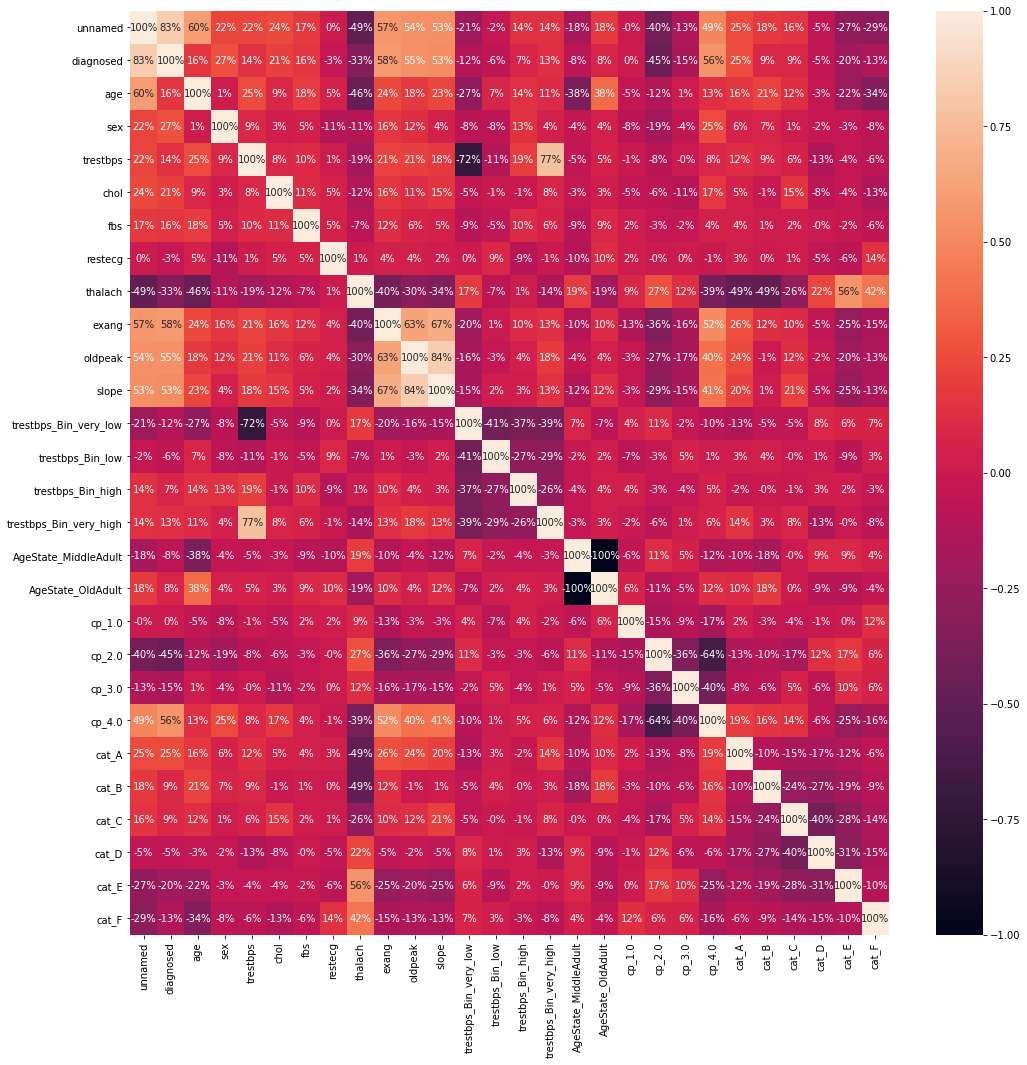

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,17))
sns.heatmap(X_train.corr(),annot=True,fmt='.0%')

In [21]:
# remove ca column
X_test = X_test.drop('ca', axis = 1)

In [22]:
# remove num column
X_test = X_test.drop('num', axis = 1)

In [23]:
# remove thal column
X_test = X_test.drop('thal', axis = 1)

In [24]:
# remove cat_G column
X_test = X_test.drop('cat_G', axis = 1)

In [25]:
# remove cat_Z column
X_test = X_test.drop('cat_Z', axis = 1)

<AxesSubplot:>

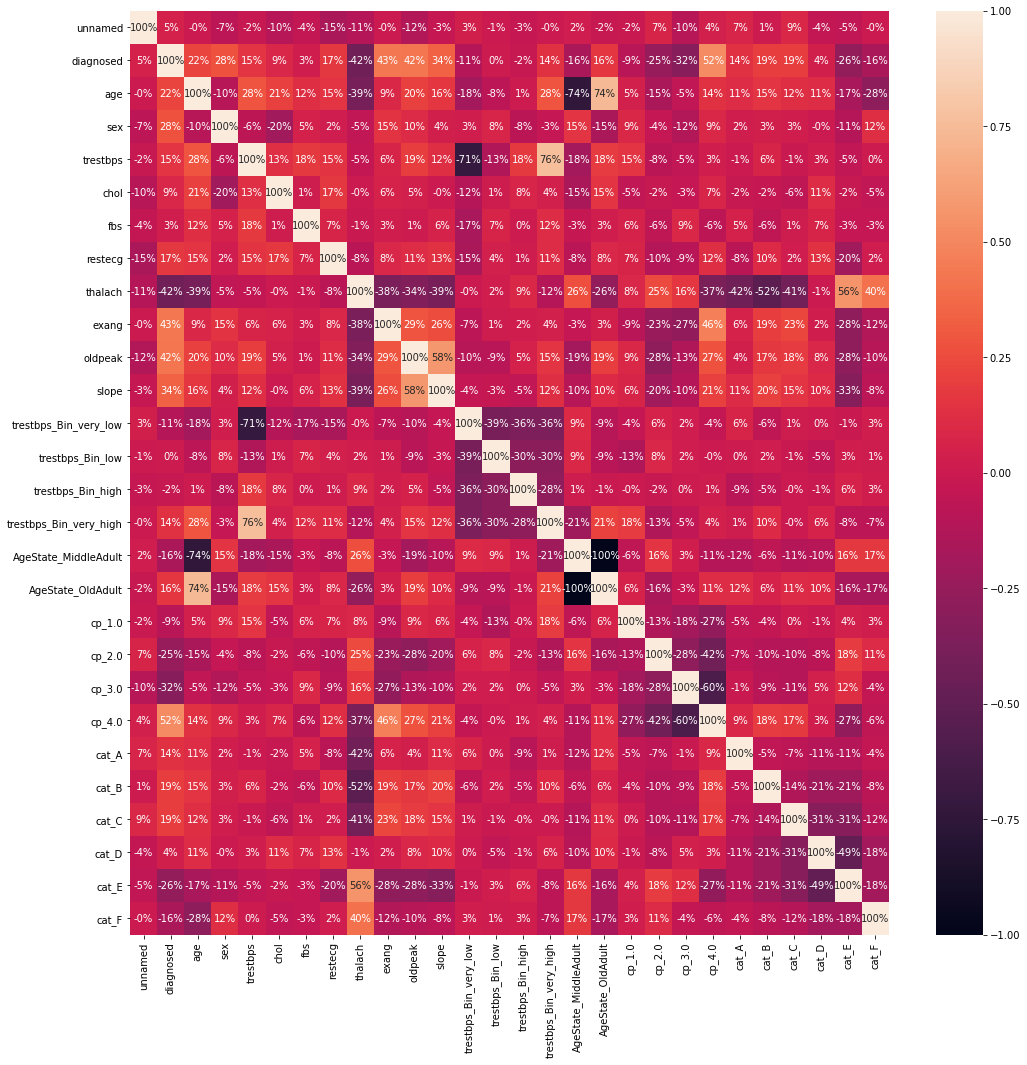

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(17,17))
sns.heatmap(X_test.corr(),annot=True,fmt='.0%')

## Logistic Regression Model

In [27]:
# import function
from sklearn.linear_model import LogisticRegression

In [28]:
# create model
model_lr_1 = LogisticRegression(random_state=0)

In [29]:
# train model
model_lr_1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
# evaluate model
print('score for logistic regression - version 1 :{0:.2f}'.format(model_lr_1.score(X_test, y_test)))

score for logistic regression - version 1 :0.52


In [31]:
# model coefficients
model_lr_1.coef_

array([[ 3.36292876e-01,  6.03549959e-02, -5.75943642e-01,
        -1.03826550e-02, -1.27614916e-01, -1.92409372e-02,
         4.19377523e-03, -1.65166131e-02, -7.85556195e-02,
         1.64189242e-04, -9.57234992e-03,  2.03538135e-03,
        -1.49668045e-02, -3.71955352e-02, -3.15632008e-03,
         4.60288954e-02, -1.56611580e-02,  6.37139363e-03,
        -9.00156924e-03, -1.15095649e-02,  2.93604113e-03,
         8.28532868e-03, -3.87843493e-03, -1.01060391e-03,
        -2.92062997e-02,  2.34516498e-02,  4.49149970e-03,
        -3.23033628e-03]])

# Part 2

### Hyperparameter Optimization

In [32]:
# base model
model_lr = LogisticRegression(random_state=0)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {'C':[1.0, 10.0, 50.0, 100.0, 1000.0], 'penalty':['l1','l2']}
clf = GridSearchCV(model_lr, param_grid=parameters, cv=3)

In [35]:
X2_test = test_df

In [36]:
y2_test = test_df['num'].ravel()

In [37]:
clf.fit(X2_test, y2_test)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']})

In [38]:
clf.best_params_

{'C': 10.0, 'penalty': 'l2'}

In [39]:
print ('best score:{0:.2f}'.format(clf.best_score_))

best score:0.71


In [40]:
# evaluate model
print('score for logistic regression - version 2 :{0:.2f}'.format(clf.score(X2_test,y2_test)))

score for logistic regression - version 2 :0.76


## Feature Normalization and Standardization

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Feature Normalization

In [42]:
# feature normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
X_train_scaled[:,0].min(),X_train_scaled[:,0].max()

(0.0, 1.0)

In [44]:
# normalize test data
X_test_scaled = scaler.transform(X_test)

### Feature Standardization

In [45]:
# feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create model after standardization

In [46]:
# base model
model_lr = LogisticRegression()
parameters={'C':[1.0,10.0,50.0, 100.0, 1000.0],'penalty':['l1','l2']}
clf = GridSearchCV(model_lr,param_grid=parameters,cv=3)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']})

In [47]:
rfc_predict = clf.predict(X_test_scaled)
rfc_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [48]:
#evaluating Random Forest Classifier
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       164
           1       1.00      0.93      0.96       139

    accuracy                           0.97       303
   macro avg       0.97      0.96      0.97       303
weighted avg       0.97      0.97      0.97       303



In [49]:
clf.best_score_

1.0

In [50]:
# evaluate model
print ('score for logistic regression - version 3: {0:.2f}'.format(clf.score(X_test_scaled,y_test)))

score for logistic regression - version 3: 0.97


## Model Persistence

In [51]:
# import pickle library
import pickle

In [52]:
# create the file paths
model_file_path = os.path.join(os.path.pardir,'models','lr_model.pkl')
scaler_file_path = os.path.join(os.path.pardir,'models','lr_scaler.pkl')


In [53]:
# open the files to write
model_file_pickle = open(model_file_path,'wb')
scaler_file_pickle = open(scaler_file_path,'wb')


In [54]:
# persist the model and scaler
pickle.dump(clf,model_file_pickle)
pickle.dump(scaler,scaler_file_pickle)

In [55]:
#close the file
model_file_pickle.close()
scaler_file_pickle.close()

### load the persisted file

In [56]:
# open files in read mode
model_file_pickle = open(model_file_path,'rb')
scaler_file_pickle = open(scaler_file_path,'rb')
# load files
clf_loaded = pickle.load(model_file_pickle)
scaler_loaded = pickle.load(scaler_file_pickle)
#close files
model_file_pickle.close()
scaler_file_pickle.close()



In [57]:
clf_loaded

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0, 50.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']})

In [58]:
scaler_loaded

StandardScaler()

In [59]:
# transform the test data using loaded scaler object
X_test_scaled = scaler_loaded.transform(X_test)
# calculate the score using loaded model object
print ('score for persisted logistic regression :{0:.2f}'.format(clf_loaded.score(X_test_scaled,y_test)))

score for persisted logistic regression :0.97


## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
#training Random Forest Classifier and making prediction
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [61]:
#evaluating Random Forest Classifier
print(classification_report(y_test, rfc_predict))


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       164
           1       0.96      0.92      0.94       139

    accuracy                           0.94       303
   macro avg       0.95      0.94      0.94       303
weighted avg       0.94      0.94      0.94       303



## Support Vector Machine

In [62]:
from sklearn.svm import SVC
# training Support Vector Machine and making prediction
svmc = SVC()
svmc.fit(X_train,y_train)
svmc_predict = svmc.predict(X_test)
svmc_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
print(classification_report(y_test, svmc_predict))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51       164
           1       0.47      0.55      0.51       139

    accuracy                           0.51       303
   macro avg       0.51      0.51      0.51       303
weighted avg       0.52      0.51      0.51       303



## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
# training Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_predict = decision_tree.predict(X_test)
dt_predict


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [65]:
print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



## Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
## Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)
nb_predict

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [67]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



## Logistic Regression

In [68]:
lr = LogisticRegression(max_iter=1000)
result = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [69]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.54      0.65      0.59       164
           1       0.46      0.35      0.40       139

    accuracy                           0.51       303
   macro avg       0.50      0.50      0.49       303
weighted avg       0.50      0.51      0.50       303



## KNN Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=12)
result = neigh.fit(X_train, y_train)
knn_predict = neigh.predict(X_test)
knn_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [71]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       164
           1       0.47      0.43      0.45       139

    accuracy                           0.52       303
   macro avg       0.51      0.51      0.51       303
weighted avg       0.52      0.52      0.52       303



In [72]:
from sklearn.model_selection import cross_val_score
knn_scores = []
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(neigh, X_test, y_test, cv=10)
knn_scores.append(score)

In [73]:
knn_scores

[array([0.5483871 , 0.58064516, 0.5483871 , 0.63333333, 0.63333333,
        0.66666667, 0.66666667, 0.6       , 0.56666667, 0.6       ])]

In [74]:
neigh.score(X_test, y_test)

0.5181518151815182

## Ensemble Learning

In [75]:
# import function
from sklearn.linear_model import LogisticRegression
# creating instances of classifiers to be used in the ensemble
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
dt = DecisionTreeClassifier()

### voting classifier that combines four different estimators

In [76]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
evc = VotingClassifier(estimators=[('svm',svm),('nb',nb),('rf',rf),('lr',lr)], 
                       voting='hard')
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

0.7953795379537953

### bagging classifier with 100 random forest estimators

In [77]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(rf, max_samples=0.6, max_features=1.0, n_estimators=100)

bg.fit(X_train, y_train)

bg.predict(X_test)

bg.score(X_test, y_test)

0.9075907590759076

### bagging classifier with 100 support vector machine estimators

In [78]:
bg = BaggingClassifier(nb, max_samples=0.6, max_features=1.0, n_estimators = 100)

bg.fit(X_train, y_train)
bg.score(X_test, y_test)

1.0

### Prepare data for Machine Learning API using Flask

In [79]:
import bz2
import pickle

# Load Model and Scaler Files
# model_path = os.path.join(os.path.pardir,os.path.pardir,'models')
model_path = os.path.join(os.path.pardir,'models') 

model_filepath = os.path.join(model_path, 'lr_model.pkl')
scaler_filepath = os.path.join(model_path, 'lr_scaler.pkl')



In [80]:
model_filepath

'..\\models\\lr_model.pkl'

In [81]:
scaler_filepath

'..\\models\\lr_scaler.pkl'

In [82]:
X_test

,unnamed,diagnosed,age,sex,trestbps,chol,fbs,restecg,thalach,exang,...,cp_1.0,cp_2.0,cp_3.0,cp_4.0,cat_A,cat_B,cat_C,cat_D,cat_E,cat_F
0,0,0,63.0,1.0,145.0,233,1,2,150.0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1,67.0,1.0,160.0,286,0,2,108.0,1,...,0,0,0,1,0,1,0,0,0,0
2,2,1,67.0,1.0,120.0,229,0,2,129.0,1,...,0,0,0,1,0,0,1,0,0,0
3,3,0,37.0,1.0,130.0,250,0,0,187.0,0,...,0,0,1,0,0,0,0,0,0,1
4,4,0,41.0,0.0,130.0,204,0,2,172.0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,1,45.0,1.0,110.0,264,0,0,132.0,0,...,1,0,0,0,0,0,1,0,0,0
299,299,1,68.0,1.0,144.0,193,1,0,141.0,0,...,0,0,0,1,0,0,0,1,0,0
300,300,1,57.0,1.0,130.0,131,0,0,115.0,1,...,0,0,0,1,0,1,0,0,0,0
301,301,1,57.0,0.0,130.0,236,0,2,174.0,0,...,0,1,0,0,0,0,0,0,1,0


In [83]:
sfile = bz2.BZ2File(model_filepath, 'w')
pickle.dump(X_test, sfile)


In [84]:
sfile = bz2.BZ2File(scaler_filepath, 'w')
pickle.dump(y_test, sfile)
